In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

53.38684812437697 91.92354806797402
-37.70341076382535 39.32654513059683
33.763921602716024 -111.28958971127055
-25.028452718566356 165.99007102926072
10.377136910375015 56.25577633728136
-29.103184988223433 -168.05440695225036
-72.63489013753338 81.08728340249081
33.99115975278853 105.1348689066528
60.10583453797426 121.41610835754113
31.23404866888879 23.984034769569035
40.741928203963056 61.900950307492536
-85.38308852757976 -162.94971019382405
81.7442770638662 51.27413455499777
60.98549679147547 -178.05385690565004
-43.16908173376617 178.27107160040958
-55.44601329767973 -138.2198428687756
-37.2838567941442 18.16567862122946
51.59980412544843 177.76302284598614
61.68738167774791 38.098012827263744
-0.3894320793395707 -103.54540954776938
10.528311571655806 -156.94279373043744
10.32073752396306 -42.70387227325122
61.967538371585306 -175.20257862874598
39.51848313340071 24.246609592258665
46.23659219549128 -129.5666628402921
44.15782613269681 98.77469131857407
-64.5643076516064 -155.1

17.05257564734123 -112.07832494941293
39.53480874459353 84.0236176400515
-7.343896443364542 32.86974942719772
-41.64284645833523 -42.955152234365954
-13.507863753530984 -108.19373684723067
70.88723438781955 -125.96991457521567
-30.27766109292873 38.36169198807099
-86.71758216924758 -9.02050747306015
12.720858340765503 28.167575154043874
-22.776496344135808 -161.92760076058707
8.724219061047876 -160.05125391551243
35.95496734052644 60.51738491878703
32.51649912110176 43.801375627565676
19.209790538357964 15.525074479646293
-8.712933813931897 17.179271530486517
-50.690053556082994 7.8011819052048565
-32.713775936306945 106.71927281792762
57.32238355576689 13.854498410710335
-83.54804274217899 -15.797106916456784
69.73227385420282 -22.01704994997516
-86.67943216616872 -19.234123310079326
52.2091558593975 16.73953642143698
-1.5358545487198256 65.40409223774154
-29.618692669789553 -73.13657162923498
56.316717765920856 93.77420065166461
-68.7323502216432 91.98509186054883
25.654878227388465 

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shushenskoye
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | apache junction
City not found. Skipping...
Processing Record 4 of Set 1 | vao
City not found. Skipping...
Processing Record 5 of Set 1 | bargal
City not found. Skipping...
Processing Record 6 of Set 1 | alofi
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | beidao
Processing Record 9 of Set 1 | khani
Processing Record 10 of Set 1 | tubruq
City not found. Skipping...
Processing Record 11 of Set 1 | gazojak
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | egvekinot
Processing Record 15 of Set 1 | waipawa
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | beringovskiy
Processing Record 19 of Set 1 | kargopol
Pr

Processing Record 28 of Set 4 | kurilsk
Processing Record 29 of Set 4 | sindou
Processing Record 30 of Set 4 | okhotsk
Processing Record 31 of Set 4 | saleaula
City not found. Skipping...
Processing Record 32 of Set 4 | formosa do rio preto
Processing Record 33 of Set 4 | tasiilaq
Processing Record 34 of Set 4 | espanola
Processing Record 35 of Set 4 | maneadero
Processing Record 36 of Set 4 | upernavik
Processing Record 37 of Set 4 | lucapa
Processing Record 38 of Set 4 | rondonopolis
Processing Record 39 of Set 4 | nobeoka
Processing Record 40 of Set 4 | marsa matruh
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | piacabucu
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | mahibadhoo
Processing Record 48 of Set 4 | bluff
Processing Record 49 of Set 4 | te anau
Processing Record 50 of Set 4 | aquin
Processing Record 1

Processing Record 12 of Set 8 | bolshegrivskoye
City not found. Skipping...
Processing Record 13 of Set 8 | khatanga
Processing Record 14 of Set 8 | gwadar
Processing Record 15 of Set 8 | tiksi
Processing Record 16 of Set 8 | maniitsoq
Processing Record 17 of Set 8 | west bend
Processing Record 18 of Set 8 | santander
Processing Record 19 of Set 8 | hofn
Processing Record 20 of Set 8 | fukue
Processing Record 21 of Set 8 | davila
Processing Record 22 of Set 8 | chake chake
Processing Record 23 of Set 8 | kwinana
Processing Record 24 of Set 8 | belmonte
Processing Record 25 of Set 8 | malakal
Processing Record 26 of Set 8 | tevriz
Processing Record 27 of Set 8 | codrington
Processing Record 28 of Set 8 | hay river
Processing Record 29 of Set 8 | milingimbi
City not found. Skipping...
Processing Record 30 of Set 8 | dingle
Processing Record 31 of Set 8 | kashi
Processing Record 32 of Set 8 | saint anthony
Processing Record 33 of Set 8 | pozoblanco
Processing Record 34 of Set 8 | poum
Pro

Processing Record 46 of Set 11 | san mateo del mar
Processing Record 47 of Set 11 | muros
Processing Record 48 of Set 11 | jijiga
Processing Record 49 of Set 11 | pincher creek
Processing Record 50 of Set 11 | gazli
Processing Record 1 of Set 12 | mariakani
Processing Record 2 of Set 12 | dakar
Processing Record 3 of Set 12 | mendi
City not found. Skipping...
Processing Record 4 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 12 | qaqortoq
City not found. Skipping...
Processing Record 6 of Set 12 | san quintin
City not found. Skipping...
Processing Record 7 of Set 12 | luanda
City not found. Skipping...
Processing Record 8 of Set 12 | rawson
Processing Record 9 of Set 12 | rincon
Processing Record 10 of Set 12 | sawtell
Processing Record 11 of Set 12 | horta
City not found. Skipping...
Processing Record 12 of Set 12 | axim
City not found. Skipping...
Processing Record 13 of Set 12 | bali
City not found. Skipping...
Processing Record 14 of Set 12 | port blair

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shushenskoye,53.3250,91.9356,68.09,47,89,13.73,RU,2022-07-19 03:00:01
1,Margate,51.3813,1.3862,73.69,71,0,9.66,GB,2022-07-19 03:00:01
2,Busselton,-33.6500,115.3333,58.32,70,0,9.48,AU,2022-07-19 03:00:04
3,Beidao,34.5686,105.8933,71.53,66,100,3.13,CN,2022-07-19 03:00:05
4,Khani,41.9563,42.9566,62.17,97,100,0.85,GE,2022-07-19 03:00:07
5,Gazojak,41.1875,61.4036,91.04,22,0,18.05,TM,2022-07-19 03:00:08
6,Mataura,-46.1927,168.8643,45.48,89,100,4.16,NZ,2022-07-19 03:00:09
7,Egvekinot,66.3167,-179.1667,52.11,47,100,2.59,RU,2022-07-19 03:00:10
8,Waipawa,-41.4122,175.5153,58.23,65,90,10.42,NZ,2022-07-19 03:00:11
9,Rikitea,-23.1203,-134.9692,74.41,77,3,11.92,PF,2022-07-19 03:00:12


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [25]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shushenskoye,RU,2022-07-19 03:00:01,53.3250,91.9356,68.09,47,89,13.73
1,Margate,GB,2022-07-19 03:00:01,51.3813,1.3862,73.69,71,0,9.66
2,Busselton,AU,2022-07-19 03:00:04,-33.6500,115.3333,58.32,70,0,9.48
3,Beidao,CN,2022-07-19 03:00:05,34.5686,105.8933,71.53,66,100,3.13
4,Khani,GE,2022-07-19 03:00:07,41.9563,42.9566,62.17,97,100,0.85
...,...,...,...,...,...,...,...,...,...
490,Mitsamiouli,KM,2022-07-19 03:16:32,-11.3847,43.2844,75.88,69,8,12.21
491,Huarmey,PE,2022-07-19 03:16:33,-10.0681,-78.1522,62.29,86,100,9.28
492,Saldanha,ZA,2022-07-19 03:16:34,-33.0117,17.9442,42.85,74,0,13.40
493,Kaniama,CD,2022-07-19 03:16:34,-7.5667,24.1833,70.95,40,96,3.96


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

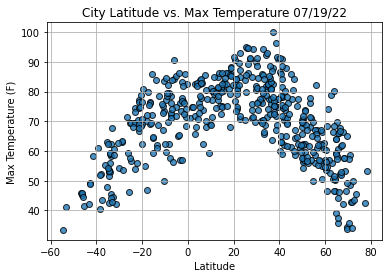

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

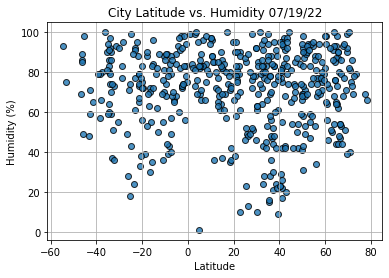

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

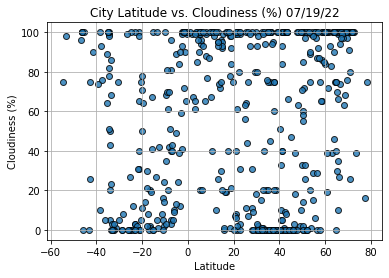

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

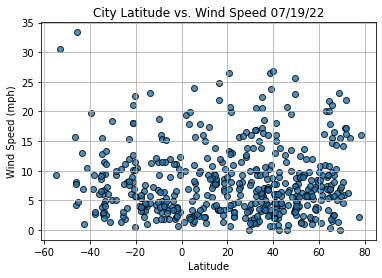

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2022-07-19 03:00:15
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    68.56
Humidity                       94
Cloudiness                     65
Wind Speed                    3.0
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
490    False
491    False
492    False
493    False
494     True
Name: Lat, Length: 495, dtype: bool

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

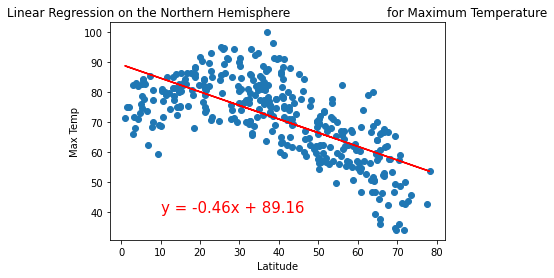

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

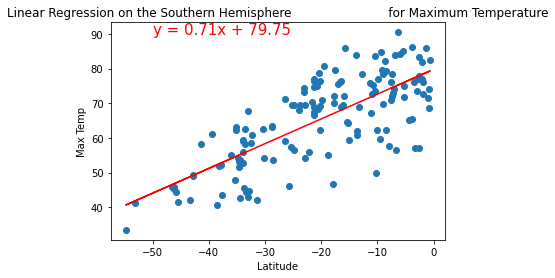

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

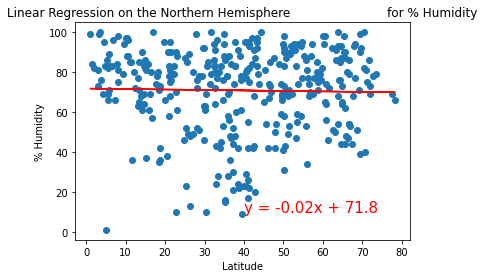

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

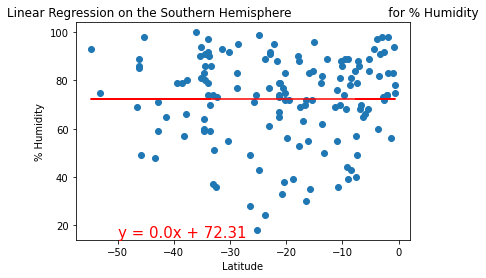

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

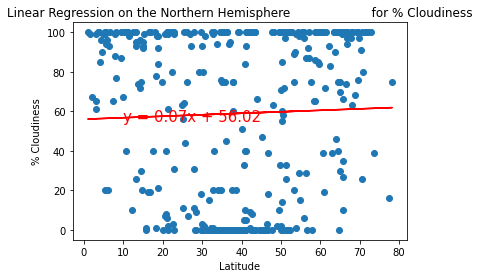

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

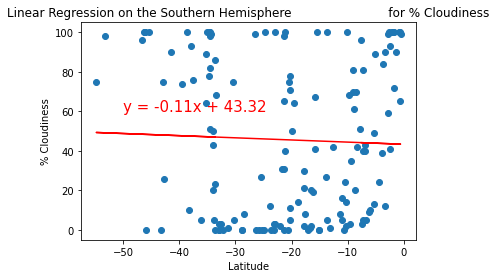

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

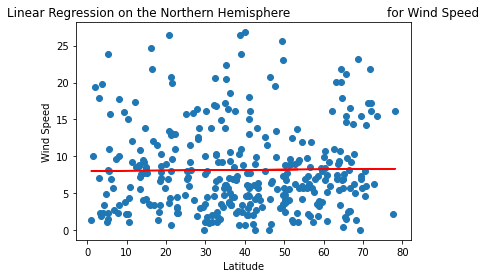

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

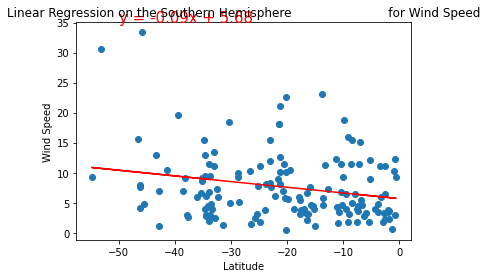

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))